imports
matplotlib is for visualization. in actual opencv use: 
cv2.imshow("name", image)

In [1]:
import cv2 #opencv
import numpy as np
import matplotlib.pyplot as plt

read and process image

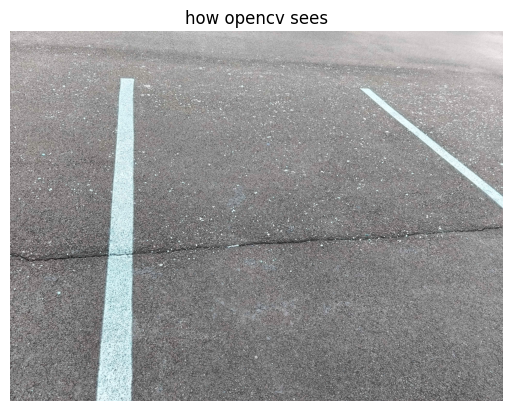

In [2]:
image = cv2.imread('data/parking_lot2.jpg')
image = np.copy(image) #to np

plt.figure()
plt.title("how opencv sees")
plt.imshow(image)
plt.axis("off")
plt.show()

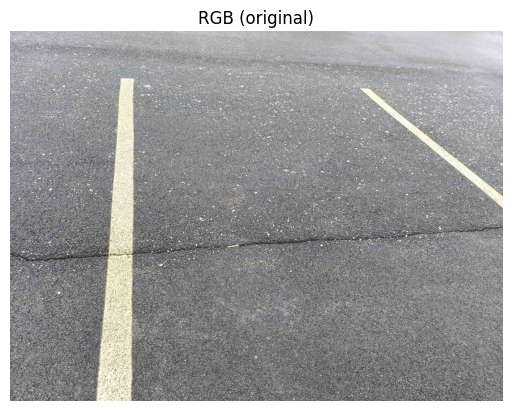

In [3]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("RGB (original)")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

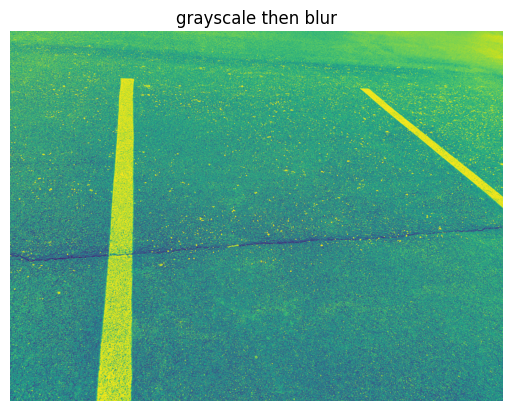

In [4]:
gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY) #grayscale of ORIGINAL
blur = cv2.GaussianBlur(gray,(67,67),33,33) #blur for noise reduction

plt.figure()
plt.title("grayscale then blur")
plt.imshow(gray)
plt.axis("off")
plt.show()


canny edge detection

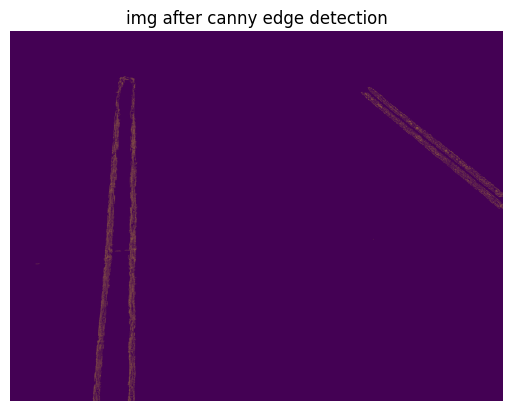

In [5]:

canny = cv2.Canny(blur, 15, 10)

# img_hp = cv2.normalize(img_ifft, None, 0, 255, cv2.NORM_MINMAX)
# img_hp = img_hp.astype(np.uint8)
# canny = cv2.Canny(img_hp, 50, 150)

plt.figure()
plt.title("img after canny edge detection")
plt.imshow(canny)
plt.axis("off")
plt.show()

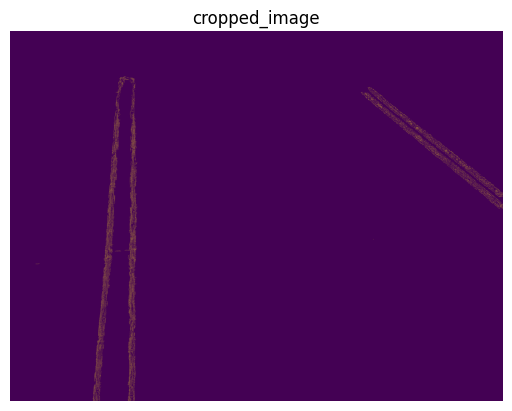

In [6]:
cropped_image = canny

plt.figure()
plt.title("cropped_image")
plt.imshow(cropped_image)
plt.axis("off")
plt.show()

In [8]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image,(x1, y1), (x2, y2), (0, 255 , 255), 10)
    return line_image



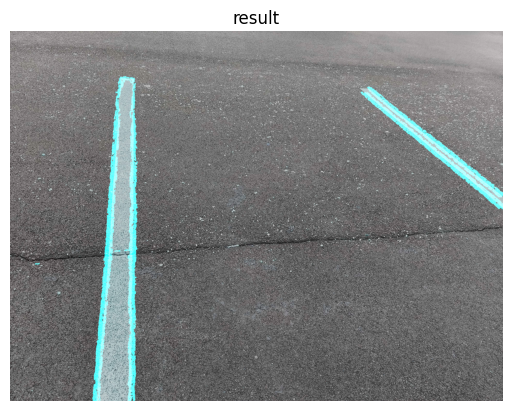

In [ ]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 10, np.array([]), minLineLength = 4, maxLineGap = 5)
line_image1 = display_lines(image, lines)
result1 = cv2.addWeighted(image, 0.8, line_image1, 1, 1)

plt.figure()
plt.title("result")
plt.imshow(result1)
plt.axis("off")
plt.show()